In [105]:
import numpy as np
import pandas as pd
import re
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Spooky

In [9]:
path = './dataset/Spooky Author Identification/split/total_with_pos.csv'
df = pd.read_csv(path, index_col=0)
length = len(df)
flair_POS = df['flair POS'].values.tolist()
nltk_POS = df['nltk POS'].values.tolist()
hmm_POS = df['hmm POS'].values.tolist()
for i in range(length):
    flair_POS[i] = eval(flair_POS[i])
    nltk_POS[i] = eval(nltk_POS[i])
    hmm_POS[i] = eval(hmm_POS[i])
    
df

,id,text,author,flair POS,nltk POS,hmm POS,flair raw,nltk raw,hmm raw
0,id26305,"This process, however, afforded me no means of...",EAP,"['DT', 'NN', ',', 'RB', ',', 'VBD', 'PRP', 'DT...","['DT', 'NN', ',', 'RB', ',', 'VBD', 'PRP', 'DT...","['DT', 'JJ', 'NN', 'IN', 'PRP', 'DT', 'NNS', '...","This <DT> process <NN> , <,> however <RB> , <,...","[('This', 'DT'), ('process', 'NN'), (',', ',')...","[('This', 'DT'), ('process,', 'JJ'), ('however..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"['PRP', 'RB', 'RB', 'VBD', 'IN', 'PRP', 'IN', ...","['PRP', 'RB', 'RB', 'VBD', 'TO', 'PRP', 'IN', ...","['PRP', 'RB', 'RB', 'VBN', 'IN', 'PRP', 'IN', ...",It <PRP> never <RB> once <RB> occurred <VBD> t...,"[('It', 'PRP'), ('never', 'RB'), ('once', 'RB'...","[('It', 'PRP'), ('never', 'RB'), ('once', 'RB'..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"['IN', 'PRP$', 'JJ', 'NN', 'VBD', 'DT', 'JJ', ...","['IN', 'PRP$', 'JJ', 'NN', 'VBD', 'DT', 'JJ', ...","['IN', 'PRP$', 'JJ', 'NN', 'VBD', 'DT', 'NN', ...",In <IN> his <PRP$> left <JJ> hand <NN> was <VB...,"[('In', 'IN'), ('his', 'PRP$'), ('left', 'JJ')...","[('In', 'IN'), ('his', 'PRP$'), ('left', 'JJ')..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"['WRB', 'JJ', 'VBZ', 'NN', 'IN', 'PRP', 'VBD',...","['WRB', 'RB', 'VBZ', 'JJ', 'IN', 'PRP', 'VBD',...","['WRB', 'JJ', 'VBZ', 'NN', 'IN', 'PRP', 'VBD',...",How <WRB> lovely <JJ> is <VBZ> spring <NN> As ...,"[('How', 'WRB'), ('lovely', 'RB'), ('is', 'VBZ...","[('How', 'WRB'), ('lovely', 'JJ'), ('is', 'VBZ..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"['VBG', 'NN', 'RB', ',', 'RB', 'RB', 'NN', ','...","['VBG', 'NN', 'RB', ',', 'RB', 'RB', 'NN', ','...","['VBG', 'NN', 'VBZ', 'RB', 'RB', 'IN', 'DT', '...","Finding <VBG> nothing <NN> else <RB> , <,> not...","[('Finding', 'VBG'), ('nothing', 'NN'), ('else...","[('Finding', 'VBG'), ('nothing', 'NN'), ('else..."
...,...,...,...,...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,"['PRP', 'MD', 'VB', 'VBN', ',', 'IN', 'PRP', '...","['PRP', 'MD', 'VB', 'VBN', ',', 'IN', 'PRP', '...","['PRP', 'MD', 'VB', 'VBN', 'IN', 'PRP', 'VBD',...","I <PRP> could <MD> have <VB> fancied <VBN> , <...","[('I', 'PRP'), ('could', 'MD'), ('have', 'VB')...","[('I', 'PRP'), ('could', 'MD'), ('have', 'VB')..."
19575,id08973,The lids clenched themselves together as if in...,EAP,"['DT', 'NNS', 'VBD', 'PRP', 'RB', 'IN', 'IN', ...","['DT', 'NNS', 'VBD', 'PRP', 'RB', 'IN', 'IN', ...","['DT', 'NN', 'IN', 'PRP', 'RB', 'RB', 'IN', 'I...",The <DT> lids <NNS> clenched <VBD> themselves ...,"[('The', 'DT'), ('lids', 'NNS'), ('clenched', ...","[('The', 'DT'), ('lids', 'NN'), ('clenched', '..."
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,"['FW', 'FW', 'FW', 'FW', 'DT', 'VBZ', 'TO', 'V...","['NNP', 'NN', 'NN', 'NN', 'WDT', 'VBZ', 'TO', ...","['DT', 'NN', '.', ""''"", 'WDT', 'VBZ', 'TO', 'V...",Mais <FW> il <FW> faut <FW> agir <FW> that <DT...,"[('Mais', 'NNP'), ('il', 'NN'), ('faut', 'NN')...","[('Mais', 'DT'), ('il', 'NN'), ('faut', '.'), ..."
19577,id17513,"For an item of news like this, it strikes us i...",EAP,"['IN', 'DT', 'NN', 'IN', 'NN', 'IN', 'DT', ','...","['IN', 'DT', 'NN', 'IN', 'NN', 'IN', 'DT', ','...","['IN', 'DT', 'NN', 'IN', 'NN', 'IN', 'IN', 'PR...",For <IN> an <DT> item <NN> of <IN> news <NN> l...,"[('For', 'IN'), ('an', 'DT'), ('item', 'NN'), ...","[('For', 'IN'), ('an', 'DT'), ('item', 'NN'), ..."


In [17]:
flair_tagset = set()
nltk_tagset = set()
hmm_tagset = set()
for i in range(length):
    flair_tagset.update(flair_POS[i])
    nltk_tagset.update(nltk_POS[i])    
    hmm_tagset.update(hmm_POS[i])    

In [18]:
print(len(flair_tagset),len(nltk_tagset),len(hmm_tagset))

43 38 51


In [20]:
flair_tagset = list(flair_tagset)
nltk_tagset = list(nltk_tagset)
hmm_tagset = list(hmm_tagset)

In [21]:
def build_n2ii2n(uniquelist):
    n2i = dict()
    i2n = dict()
    for i,item in enumerate(uniquelist):
        n2i[item] = i
        i2n[i] = item
    return n2i, i2n

In [35]:
flair_n2i, flair_i2n = build_n2ii2n(flair_tagset)
flair_freq = []
for i in range(length):
    temp_arr = np.zeros(len(flair_tagset))
    for tag in flair_POS[i]:
        temp_arr[flair_n2i[tag]] += 1
    temp_arr = temp_arr.tolist()
    flair_freq.append(temp_arr)

In [36]:
nltk_n2i, nltk_i2n = build_n2ii2n(nltk_tagset)
nltk_freq = []
for i in range(length):
    temp_arr = np.zeros(len(nltk_tagset))
    for tag in nltk_POS[i]:
        temp_arr[nltk_n2i[tag]] += 1
    temp_arr = temp_arr.tolist()
    nltk_freq.append(temp_arr)

In [37]:
hmm_n2i, hmm_i2n = build_n2ii2n(hmm_tagset)
hmm_freq = []
for i in range(length):
    temp_arr = np.zeros(len(hmm_tagset))
    for tag in hmm_POS[i]:
        temp_arr[hmm_n2i[tag]] += 1
    temp_arr = temp_arr.tolist()
    hmm_freq.append(temp_arr)

In [38]:
df['flair_freq'] = flair_freq
df['nltk_freq'] = nltk_freq
df['hmm_freq'] = hmm_freq

df

,id,text,author,flair POS,nltk POS,hmm POS,flair raw,nltk raw,hmm raw,flair_freq,nltk_freq,hmm_freq
0,id26305,"This process, however, afforded me no means of...",EAP,"['DT', 'NN', ',', 'RB', ',', 'VBD', 'PRP', 'DT...","['DT', 'NN', ',', 'RB', ',', 'VBD', 'PRP', 'DT...","['DT', 'JJ', 'NN', 'IN', 'PRP', 'DT', 'NNS', '...","This <DT> process <NN> , <,> however <RB> , <,...","[('This', 'DT'), ('process', 'NN'), (',', ',')...","[('This', 'DT'), ('process,', 'JJ'), ('however...","[0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 1.0, 4.0, 0.0, ...","[0.0, 3.0, 0.0, 2.0, 2.0, 4.0, 1.0, 0.0, 0.0, ...","[0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"['PRP', 'RB', 'RB', 'VBD', 'IN', 'PRP', 'IN', ...","['PRP', 'RB', 'RB', 'VBD', 'TO', 'PRP', 'IN', ...","['PRP', 'RB', 'RB', 'VBN', 'IN', 'PRP', 'IN', ...",It <PRP> never <RB> once <RB> occurred <VBD> t...,"[('It', 'PRP'), ('never', 'RB'), ('once', 'RB'...","[('It', 'PRP'), ('never', 'RB'), ('once', 'RB'...","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"['IN', 'PRP$', 'JJ', 'NN', 'VBD', 'DT', 'JJ', ...","['IN', 'PRP$', 'JJ', 'NN', 'VBD', 'DT', 'JJ', ...","['IN', 'PRP$', 'JJ', 'NN', 'VBD', 'DT', 'NN', ...",In <IN> his <PRP$> left <JJ> hand <NN> was <VB...,"[('In', 'IN'), ('his', 'PRP$'), ('left', 'JJ')...","[('In', 'IN'), ('his', 'PRP$'), ('left', 'JJ')...","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 0.0, ...","[0.0, 2.0, 0.0, 0.0, 4.0, 4.0, 0.0, 0.0, 0.0, ...","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"['WRB', 'JJ', 'VBZ', 'NN', 'IN', 'PRP', 'VBD',...","['WRB', 'RB', 'VBZ', 'JJ', 'IN', 'PRP', 'VBD',...","['WRB', 'JJ', 'VBZ', 'NN', 'IN', 'PRP', 'VBD',...",How <WRB> lovely <JJ> is <VBZ> spring <NN> As ...,"[('How', 'WRB'), ('lovely', 'RB'), ('is', 'VBZ...","[('How', 'WRB'), ('lovely', 'JJ'), ('is', 'VBZ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 3.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 5.0, 3.0, 0.0, 0.0, 1.0, ...","[0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"['VBG', 'NN', 'RB', ',', 'RB', 'RB', 'NN', ','...","['VBG', 'NN', 'RB', ',', 'RB', 'RB', 'NN', ','...","['VBG', 'NN', 'VBZ', 'RB', 'RB', 'IN', 'DT', '...","Finding <VBG> nothing <NN> else <RB> , <,> not...","[('Finding', 'VBG'), ('nothing', 'NN'), ('else...","[('Finding', 'VBG'), ('nothing', 'NN'), ('else...","[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0, 2.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,"['PRP', 'MD', 'VB', 'VBN', ',', 'IN', 'PRP', '...","['PRP', 'MD', 'VB', 'VBN', ',', 'IN', 'PRP', '...","['PRP', 'MD', 'VB', 'VBN', 'IN', 'PRP', 'VBD',...","I <PRP> could <MD> have <VB> fancied <VBN> , <...","[('I', 'PRP'), ('could', 'MD'), ('have', 'VB')...","[('I', 'PRP'), ('could', 'MD'), ('have', 'VB')...","[0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, ...","[0.0, 4.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, ...","[0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19575,id08973,The lids clenched themselves together as if in...,EAP,"['DT', 'NNS', 'VBD', 'PRP', 'RB', 'IN', 'IN', ...","['DT', 'NNS', 'VBD', 'PRP', 'RB', 'IN', 'IN', ...","['DT', 'NN', 'IN', 'PRP', 'RB', 'RB', 'IN', 'I...",The <DT> lids <NNS> clenched <VBD> themselves ...,"[('The', 'DT'), ('lids', 'NNS'), ('clenched', ...","[('The', 'DT'), ('lids', 'NN'), ('clenched', '...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,"['FW', 'FW', 'FW', 'FW', 'DT', 'VBZ', 'TO', '

In [97]:
# df.to_csv('./dataset/Spooky Author Identification/split/total_with_pos.csv')

## flair
### plots

In [66]:
flair_count_mat = np.array(flair_freq)
flair_freq_mat = flair_count_mat.copy()
for i in range(length):
    flair_freq_mat[i,:] = flair_freq_mat[i,:]/flair_freq_mat[i,:].sum()

In [70]:
author = df['author'].values.tolist()
EAP_idx = []
HPL_idx = []
MWS_idx = []
for i in range(length):
    if author[i] == 'EAP': # HPL MWS
        EAP_idx.append(i)
    elif author[i] == 'HPL': 
        HPL_idx.append(i)
    elif author[i] == 'MWS': 
        MWS_idx.append(i)
    else:
        print('error')

In [71]:
EAP_flair = flair_freq_mat[EAP_idx]
HPL_flair = flair_freq_mat[HPL_idx]
MWS_flair = flair_freq_mat[MWS_idx]
all_flair = np.vstack((EAP_flair, HPL_flair, MWS_flair))

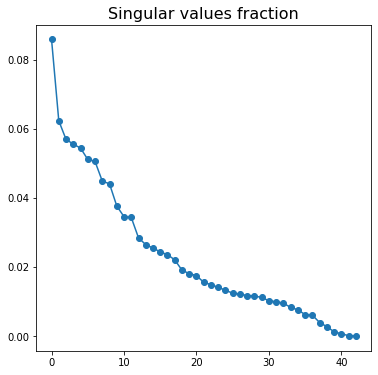

In [84]:
pca_flair = PCA(n_components=len(flair_tagset))
pca_flair.fit(all_flair)
singular_values=pca_flair.singular_values_
singular_values = singular_values/np.sum(singular_values)
plt.figure(figsize=(6,6))
plt.plot(singular_values, '-o')
plt.title('Singular values fraction',fontsize = 16)
plt.show()

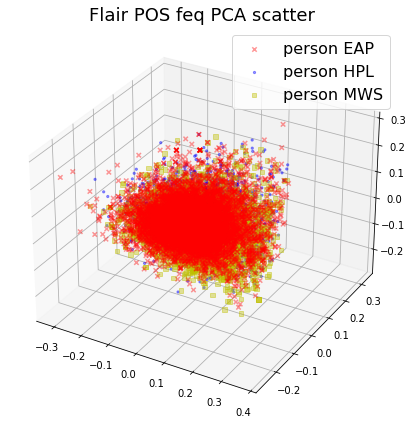

In [77]:
pca_flair_3d = PCA(n_components=3)
pca_flair_3d.fit(all_flair)

mats_flair = [EAP_flair,  HPL_flair, MWS_flair]
labels = [('r','x','EAP'),('b','.','HPL'),('y','s', 'MWS')]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
alpha = 0.4

for idx, mat in enumerate(mats_flair):
    pos_normed_pca = pca_flair_3d.transform(mat)
    x = pos_normed_pca[:,0]
    y = pos_normed_pca[:,1]
    z = pos_normed_pca[:,2]
#     ax.scatter(x, y, z, c=labels[idx][0] ,marker = labels[idx][1], alpha = alpha, label = labels[idx][2])
    ax.scatter(x, y, z, c=labels[idx][0] ,marker = labels[idx][1], alpha = alpha, label = 'person {}'.format(labels[idx][2]))
plt.legend(fontsize = 16)
plt.title('Flair POS feq PCA scatter',fontsize = 18)
plt.tight_layout()
plt.show()

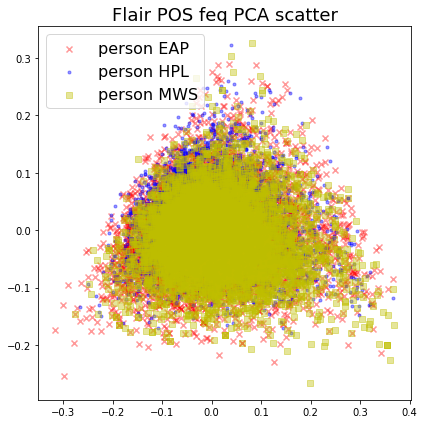

In [78]:
pca_flair_2d = PCA(n_components=2)
pca_flair_2d.fit(all_flair)

mats_flair = [EAP_flair,  HPL_flair, MWS_flair]
labels = [('r','x','EAP'),('b','.','HPL'),('y','s', 'MWS')]

fig = plt.figure(figsize=(6,6))
alpha = 0.4

for idx, mat in enumerate(mats_flair):
    pos_normed_pca = pca_flair_2d.transform(mat)
    x = pos_normed_pca[:,0]
    y = pos_normed_pca[:,1]
    plt.scatter(x, y, c=labels[idx][0] ,marker = labels[idx][1], alpha = alpha, label = 'person {}'.format(labels[idx][2]))
plt.legend(fontsize = 16)
plt.title('Flair POS feq PCA scatter',fontsize = 18)
plt.tight_layout()
plt.show()

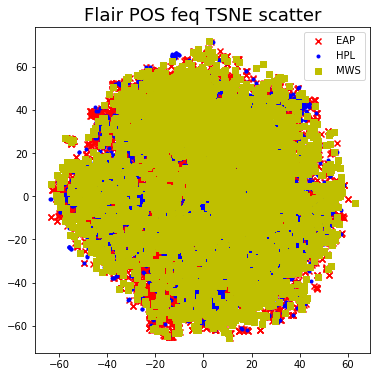

In [83]:
tsne_flair_2d = TSNE(n_components=2).fit_transform(all_flair)

idx_range = np.zeros(4,dtype=int)
idx_range[1:] = idx_range[1:] + len(EAP_idx)
idx_range[2:] = idx_range[2:] + len(HPL_idx)
idx_range[3:] = idx_range[3:] + len(MWS_idx)

plt.figure(figsize=(6,6))

for i in range(3):
    plt.scatter(tsne_flair_2d[idx_range[i]:idx_range[i+1],0],tsne_flair_2d[idx_range[i]:idx_range[i+1],1],c=labels[i][0] ,marker = labels[i][1], label = labels[i][2])
plt.legend()
plt.title('Flair POS feq TSNE scatter',fontsize = 18)
plt.show()

### center distance and radiant

In [91]:
# EAP_flair = flair_freq_mat[EAP_idx]
# HPL_flair = flair_freq_mat[HPL_idx]
# MWS_flair = flair_freq_mat[MWS_idx]

EAP_center = EAP_flair.mean(axis = 0)
HPL_center = HPL_flair.mean(axis = 0)
MWS_center = MWS_flair.mean(axis = 0)

In [92]:
np.linalg.norm(EAP_center-HPL_center)

0.039338186720629574

In [94]:
np.linalg.norm(EAP_center-MWS_center)

0.0474095225359765

In [93]:
np.linalg.norm(HPL_center-MWS_center)

0.04843950416441918

In [96]:
EAP_flair_diff = EAP_flair - EAP_center
HPL_flair_diff = HPL_flair - HPL_center
MWS_flair_diff = MWS_flair - MWS_center

In [100]:
EAP_flair_dist = np.linalg.norm(EAP_flair_diff,axis = 1)
HPL_flair_dist = np.linalg.norm(HPL_flair_diff,axis = 1)
MWS_flair_dist = np.linalg.norm(MWS_flair_diff,axis = 1)

In [102]:
np.sort(EAP_flair_dist)[int(0.68*len(EAP_idx))] # 1 sigma radiant

0.22112374070554203

In [103]:
np.sort(HPL_flair_dist)[int(0.68*len(HPL_idx))] # 1 sigma radiant

0.1944977539151543

In [104]:
np.sort(MWS_flair_dist)[int(0.68*len(MWS_idx))] # 1 sigma radiant

0.20362813008433203

## nltk

In [106]:
nltk_count_mat = np.array(nltk_freq)
nltk_freq_mat = nltk_count_mat.copy()
for i in range(length):
    nltk_freq_mat[i,:] = nltk_freq_mat[i,:]/nltk_freq_mat[i,:].sum()

In [107]:
EAP_nltk = nltk_freq_mat[EAP_idx]
HPL_nltk = nltk_freq_mat[HPL_idx]
MWS_nltk = nltk_freq_mat[MWS_idx]
all_nltk = np.vstack((EAP_nltk, HPL_nltk, MWS_nltk))

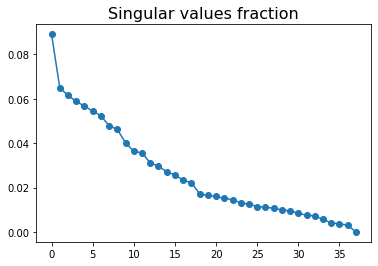

In [109]:
pca_nltk = PCA(n_components=len(nltk_tagset))
pca_nltk.fit(all_nltk)
singular_values=pca_nltk.singular_values_
singular_values = singular_values/np.sum(singular_values)
# plt.figure(figsize=(6,6))
plt.plot(singular_values, '-o')
plt.title('Singular values fraction',fontsize = 16)
plt.show()

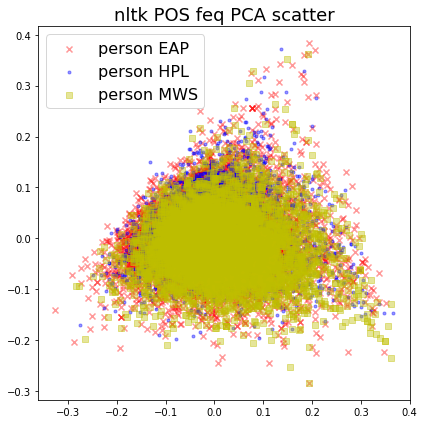

In [112]:
pca_nltk_2d = PCA(n_components=2)
pca_nltk_2d.fit(all_nltk)

mats_nltk = [EAP_nltk,  HPL_nltk, MWS_nltk]
labels = [('r','x','EAP'),('b','.','HPL'),('y','s', 'MWS')]

fig = plt.figure(figsize=(6,6))
alpha = 0.4

for idx, mat in enumerate(mats_nltk):
    pos_normed_pca = pca_nltk_2d.transform(mat)
    x = pos_normed_pca[:,0]
    y = pos_normed_pca[:,1]
    plt.scatter(x, y, c=labels[idx][0] ,marker = labels[idx][1], alpha = alpha, label = 'person {}'.format(labels[idx][2]))
plt.legend(fontsize = 16)
plt.title('nltk POS feq PCA scatter',fontsize = 18)
plt.tight_layout()
plt.show()

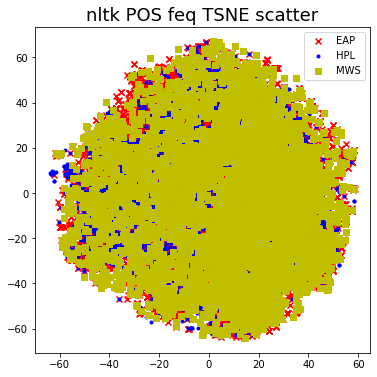

In [113]:
tsne_nltk_2d = TSNE(n_components=2).fit_transform(all_nltk)

plt.figure(figsize=(6,6))

for i in range(3):
    plt.scatter(tsne_nltk_2d[idx_range[i]:idx_range[i+1],0],tsne_nltk_2d[idx_range[i]:idx_range[i+1],1],c=labels[i][0] ,marker = labels[i][1], label = labels[i][2])
plt.legend()
plt.title('nltk POS feq TSNE scatter',fontsize = 18)
plt.show()